In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("D:\Machine Learning\Model Train with CV using Lasso\Algerian_forest_fires_dataset_CLEANED.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)

In [35]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [36]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [37]:
X = df.drop("FWI", axis=1)
y = df["FWI"]

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=69)
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [39]:
def correlation(dataset, threshold):
    cols = set()
    corr = dataset.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j] > threshold):
                cols.add(corr.columns[i])

    return cols

In [40]:
cols = correlation(X_train, 0.85)
cols

{'BUI', 'DC'}

In [41]:
X_train.drop(cols, axis=1, inplace=True)
X_test.drop(cols, axis=1, inplace=True)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

R2 Score :  0.9223260333326482


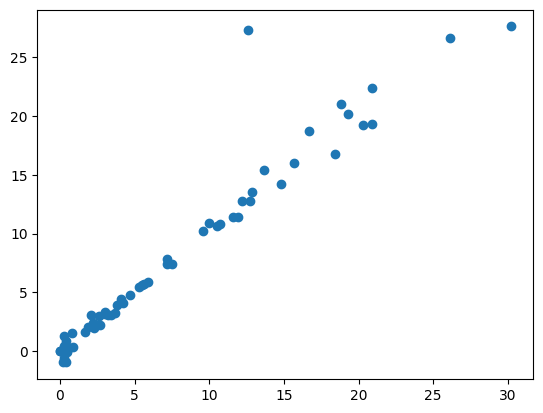

In [43]:
# Ridge regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge()

ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

score = r2_score(y_test, y_pred)

print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

In [52]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

R2 Score :  0.9223260333326482


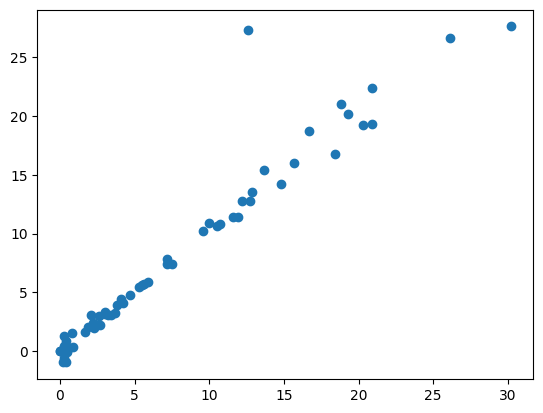

In [44]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)

ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)

score = r2_score(y_test, y_pred)

print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

In [51]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

R2 Score :  0.8888199466310684


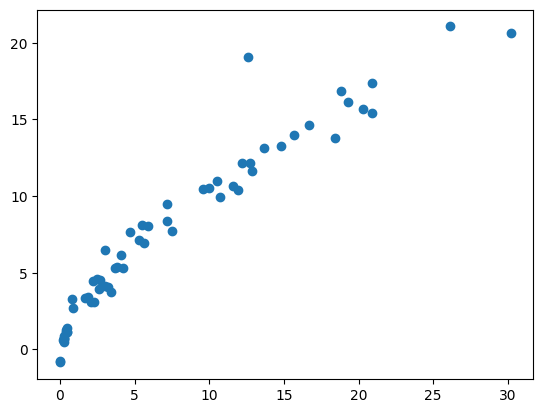

In [46]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)

score = r2_score(y_test, y_pred)

print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

In [50]:
elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

R2 Score :  0.9239705210202355


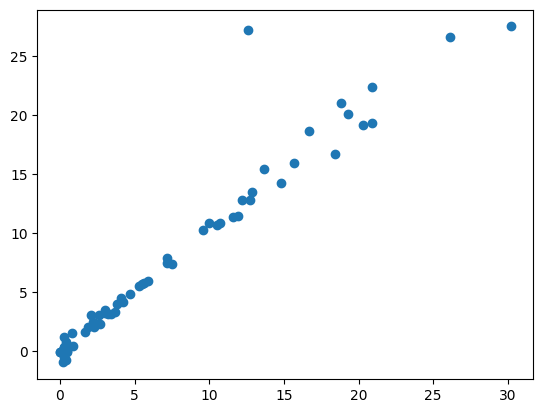

In [48]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)

elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)

score = r2_score(y_test, y_pred)

print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

In [49]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [53]:
# model trained with ElasticNetCV gave us greater accuracy so, we will pickle it
scaler

StandardScaler()

In [54]:
elasticcv

ElasticNetCV(cv=5)

In [55]:
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(elasticcv, open("model.pkl", "wb"))